<a href="https://colab.research.google.com/github/caalr11/FisicaComputacional1/blob/master/Actividad12/Actividad12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ACTIVIDAD 12

CARLOS ANDRES ARIAS LOPEZ REYES

Ejercicio 1:
Resuelva la ecuación de Poisson sobre un cuadrado unitario, con condiciones de Dirichlet cero en las fronteras.

$$\begin{eqnarray*}
- \nabla^2 u(x,y)= \cos(2\pi x) \sin(3\pi y) \\
 \mathrm{dadas \ las \ condiciones}  \\ 
u(0,y)= 0 \\
u(1,y)= 0 \\
u(x,0)= 0 \\
u(x,1)= 0
\end{eqnarray*}$$

In [3]:
from scipy import sparse
from scipy.sparse.linalg import spsolve
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Función 1
def rhs_func( x, y, M ):
  g = ( np.multiply( np.cos( 2*np.pi*X[ 1 : -1, 1 : -1 ] ), 
                    np.sin( 3*np.pi*Y[ 1 : -1 , 1 : -1 ] ) ) ).flatten()
  f = [ g[ i :: M - 2 ] for i in range( M - 2 ) ]
  f = np.asarray( f ).flatten() 
  return f

#Función 2
def bc_dirichlet(x, y, m):
  lBC = np.zeros( ( M, 1 ) ).flatten()
  leftBC = lBC[ 1 : M - 1 ]
  rBC = np.zeros( ( M, 1 ) ).flatten()
  rightBC = rBC[ 1 : M - 1 ]
  tBC = np.zeros( ( 1, M ) ).flatten()
  topBC = tBC[1:M-1]
  bBC = np.zeros( ( 1, M ) ).flatten()
  bottomBC = bBC[ 1 : M - 1 ]
  g1 = np.zeros( ( ( M - 2 )**2, 1 ) ).flatten()

  for i in range( M - 2 ):
    g1[ ( M - 2 )*i ] = topBC[ i ] 

  for j in range( M - 2 ):
    g1[ ( M - 2 )*( j + 1 ) - 1 ] = bottomBC[ j ]
    
  k1 = np.zeros( ( len( leftBC ), 1 ) )
  k1[0] = 1.0
  leftBCk = sparse.kron( k1, leftBC ).toarray().flatten()
    
  k2 = np.zeros( ( len( rightBC ), 1 ) )
  k2[ -1 ] = 1.0
  rightBCk = sparse.kron( k2, rightBC ).toarray().flatten()
    
  g = g1 + leftBCk + rightBCk
    
  return [ g, lBC, tBC, rBC, bBC ]
    
#Función 3
def generate_lhs_matrix(M, hx, hy):
  α = hx**2/hy**2
  main_diag = 2*( 1 + α )*np.ones( ( M - 2, 1 ) ).ravel()
  off_diag = -1*np.ones( ( M - 2, 1 ) ).ravel()
  a = main_diag.shape[ 0 ]
  diagonals = [ main_diag, off_diag, off_diag ]
  B = sparse.diags( diagonals, [ 0, -1, 1 ], shape=( a, a ) ).toarray()
  e1 = sparse.eye( M - 2 ).toarray()
  A1 = sparse.kron( e1, B ).toarray()
  C = sparse.diags( [ -1*np.ones( ( M + 1, 1 ) ).ravel()], [ 0 ], shape = ( a, a ) ).toarray()
  e2 = sparse.diags( [ 1*np.ones( ( M, 1 ) ).ravel(), 1*np.ones( ( M, 1 ) ).ravel() ], 
                    [ -1, 1 ], shape = ( M - 2, M - 2 ) ).toarray()
  A2 = sparse.kron( e2, C) .toarray()
  mat = A1 + A2
  return mat

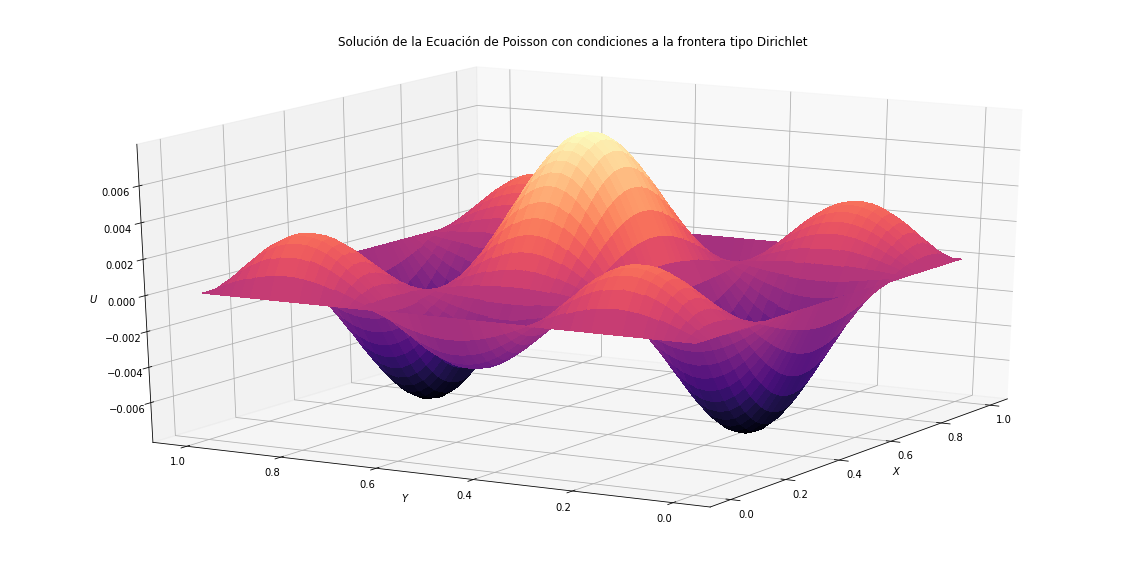

In [5]:
M = 50
( x0, xf ) = ( 0.0, 1.0 )
( y0, yf ) = ( 0.0, 1.0 )
hx = ( xf - x0 )/( M - 1 )
hy = ( yf - y0 )/( M - 1 )
x1 = np.linspace( x0, xf, M )
y1 = np.linspace( y0, yf, M )

X, Y = np.meshgrid( x1, y1 )
frhs = rhs_func( X, Y, M )

fbc = bc_dirichlet( X, Y, M )
rhs = frhs*( hx**2 ) + fbc[ 0 ]
A = generate_lhs_matrix( M, hx, hy )

V = np.linalg.solve( A, rhs )

V = V.reshape( ( M - 2, M - 2 ) ).T

U = np.zeros( ( M ,M ) )

U[ 1 : M - 1, 1 : M - 1 ] = V

U[ :, 0 ] = fbc[ 1 ]
U[ 0, : ] = fbc[ 2 ]
U[ :, M - 1 ] = fbc[ 3 ]
U[ M - 1, : ] = fbc[ 4 ]

fig = plt.figure( figsize = ( 16, 8 ) )
ax = fig.gca( projection = "3d" )

surf = ax.plot_surface( X, Y, U, cmap = cm.magma, 
                       linewidth = 0, antialiased = False )
ax.set_xlabel( "$X$" )
ax.set_ylabel( "$Y$" )
ax.set_zlabel( "$U$" )
ax.set_title( "Solución de la Ecuación de Poisson con condiciones a la frontera tipo Dirichlet" )
plt.tight_layout()
ax.view_init( 20, -150 )
plt.show()

EJERCICIO 2:

Resuelva la ecuación de Poisson sobre un cuadrado unitario, para encontrar los modos de vibración de una membrana:

$$\begin{eqnarray*}
- \nabla^2 u(x,y) &; = &; \sin(n\pi x) \sin(m\pi y) \\
 \mathrm{dadas \ las \ condiciones}&; &;  \\ 
u(0,y) &; = &; 0 \\
u(1,y) &; = &; 0 \\
u(x,0) &; = &; 0 \\
u(x,1) &; = &; 0
\end{eqnarray*}$$
para los siguientes casos:

$n=1; m=1$, modo (1,1)

$n=1; m=3$, modo (1,3)

$n=2; m=2$, modo (2,2)

In [6]:
#Función 1
def rhs_func( x, y, M, n, m2 ):
  g = ( np.multiply( np.sin( n*np.pi*X[ 1 : -1, 1 : -1 ] ), 
                    np.sin( m2*np.pi*Y[ 1 : -1, 1 : -1 ] ) ) ).flatten()
  f = [ g[ i :: M - 2 ] for i in range( M - 2 ) ]
  f = np.asarray( f ).flatten() 
  return f

#Función 2

def bc_dirichlet(x, y, m):

  lBC = np.zeros( ( M, 1 ) ).flatten()
  leftBC = lBC[ 1 : M - 1 ]
  rBC = np.zeros( ( M, 1 ) ).flatten()
  rightBC = rBC[ 1 : M - 1 ]
  tBC = np.zeros( ( 1, M ) ).flatten()
  topBC = tBC[1:M-1]
  bBC = np.zeros( ( 1, M ) ).flatten()
  bottomBC = bBC[ 1 : M - 1 ]
  g1 = np.zeros( ( ( M - 2 )**2, 1 ) ).flatten()
  for i in range( M - 2 ):
    g1[ ( M - 2 )*i ] = topBC[ i ] 
  for j in range( M - 2 ):
    g1[ ( M - 2 )*( j + 1 ) - 1 ] = bottomBC[ j ]
  k1 = np.zeros( ( len( leftBC ), 1 ) )
  k1[0] = 1.0
  leftBCk = sparse.kron( k1, leftBC ).toarray().flatten()
  k2 = np.zeros( ( len( rightBC ), 1 ) )
  k2[ -1 ] = 1.0
  rightBCk = sparse.kron( k2, rightBC ).toarray().flatten()
  g = g1 + leftBCk + rightBCk
  return [ g, lBC, tBC, rBC, bBC ]

#Función 3

def generate_lhs_matrix(M, hx, hy):
  α = hx**2/hy**2
  main_diag = 2*( 1 + α )*np.ones( ( M - 2, 1 ) ).ravel()
  off_diag = -1*np.ones( ( M - 2, 1 ) ).ravel()
  a = main_diag.shape[ 0 ]
  diagonals = [ main_diag, off_diag, off_diag ]
  B = sparse.diags( diagonals, [ 0, -1, 1 ], shape=( a, a ) ).toarray()
  e1 = sparse.eye( M - 2 ).toarray()
  A1 = sparse.kron( e1, B ).toarray()
  C = sparse.diags( [ -1*np.ones( ( M + 1, 1 ) ).ravel()], [ 0 ], shape = ( a, a ) ).toarray()
  e2 = sparse.diags( [ 1*np.ones( ( M, 1 ) ).ravel(), 1*np.ones( ( M, 1 ) ).ravel() ], 
                    [ -1, 1 ], shape = ( M - 2, M - 2 ) ).toarray()
  A2 = sparse.kron( e2, C) .toarray()
  mat = A1 + A2
  return mat

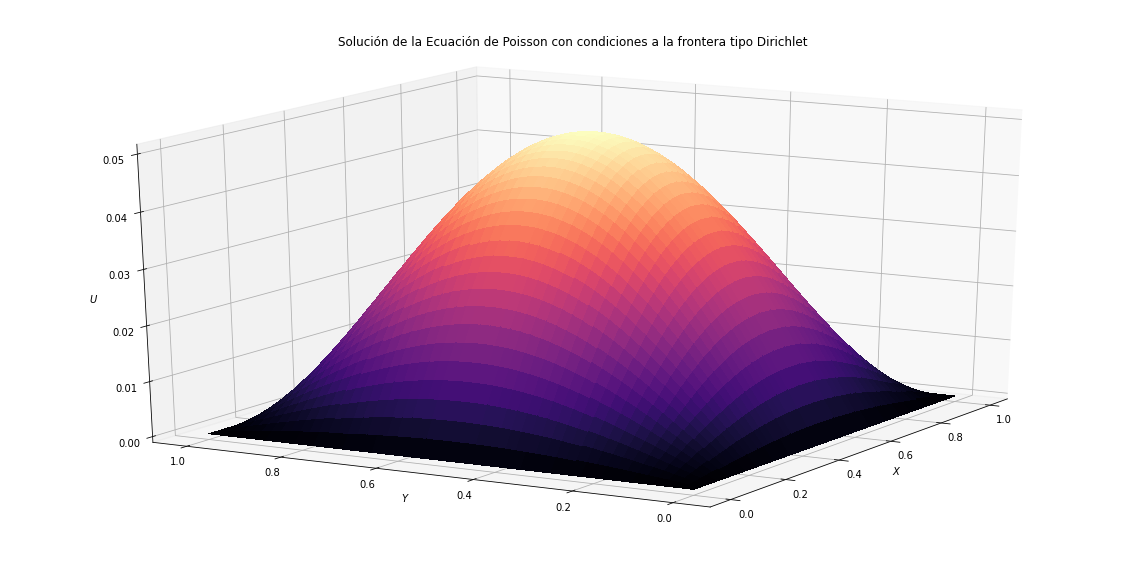

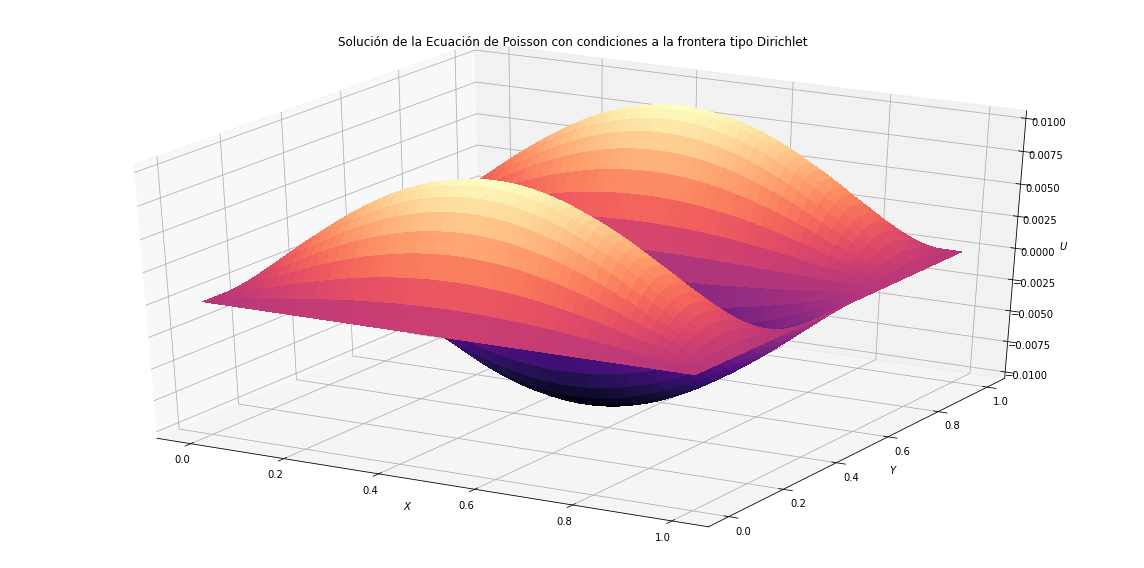

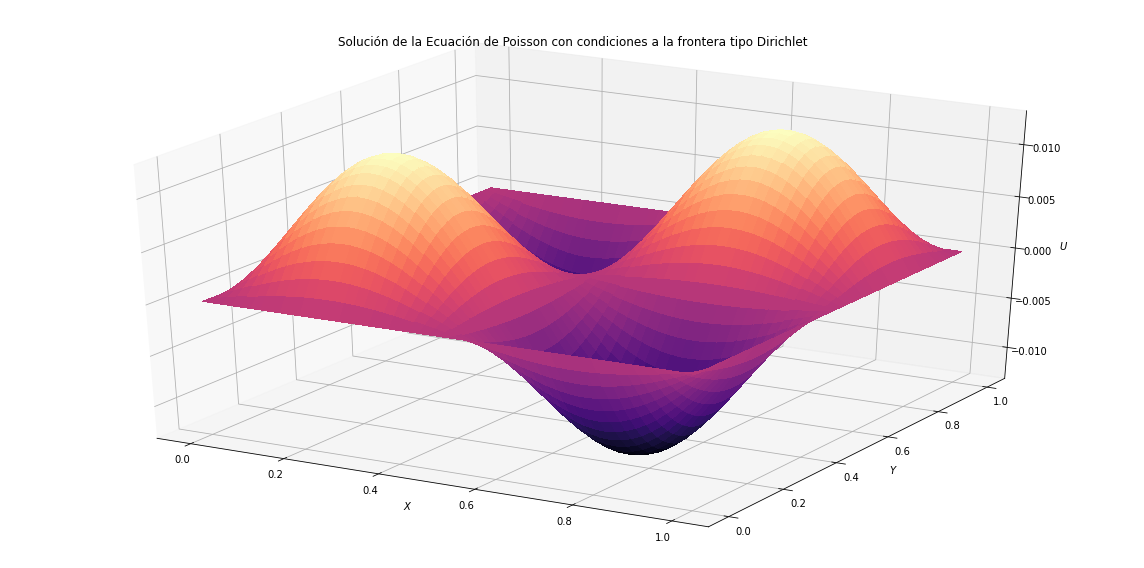

In [7]:
#SOLUCIÓN
M = 50
( x0, xf ) = ( 0.0, 1.0 )
( y0, yf ) = ( 0.0, 1.0 )
hx = ( xf - x0 )/( M - 1 )
hy = ( yf - y0 )/( M - 1 )
x1 = np.linspace( x0, xf, M )
y1 = np.linspace( y0, yf, M )
X, Y = np.meshgrid( x1, y1 )
frhs = rhs_func( X, Y, M, 1, 1 )
fbc = bc_dirichlet( X, Y, M )
A = generate_lhs_matrix( M, hx, hy )

#Modo 1 ( 1, 1 )
frhs1 = rhs_func( X, Y, M, 1, 1 )
rhs1 = frhs1*( hx**2 ) + fbc[ 0 ]
V1 = np.linalg.solve( A, rhs1 )
V1 = V1.reshape( ( M - 2, M - 2 ) ).T
U1 = np.zeros( ( M ,M ) )
U1[ 1 : M - 1, 1 : M - 1 ] = V1
U1[ :, 0 ] = fbc[ 1 ]
U1[ 0, : ] = fbc[ 2 ]
U1[ :, M - 1 ] = fbc[ 3 ]
U1[ M - 1, : ] = fbc[ 4 ]

fig = plt.figure( figsize = ( 16, 8 ) )
ax = fig.gca( projection = "3d" )
surf = ax.plot_surface( X, Y, U1, cmap = cm.magma, 
                       linewidth = 0, antialiased = False )
ax.set_xlabel( "$X$" )
ax.set_ylabel( "$Y$" )
ax.set_zlabel( "$U$" )
ax.set_title( "Solución de la Ecuación de Poisson con condiciones a la frontera tipo Dirichlet" )
plt.tight_layout()
ax.view_init( 20, -150 )
plt.show()

#Modo ( 1, 3 )
frhs2 = rhs_func( X, Y, M, 1, 3 )
rhs2 = frhs2*( hx**2 ) + fbc[ 0 ]
V2 = np.linalg.solve( A, rhs2 )
V2 = V2.reshape( ( M - 2, M - 2 ) ).T
U2 = np.zeros( ( M ,M ) )
U2[ 1 : M - 1, 1 : M - 1 ] = V2
U2[ :, 0 ] = fbc[ 1 ]
U2[ 0, : ] = fbc[ 2 ]
U2[ :, M - 1 ] = fbc[ 3 ]
U2[ M - 1, : ] = fbc[ 4 ]
fig2 = plt.figure( figsize = ( 16, 8 ) )
ax2 = fig2.gca( projection = "3d" )
surf2 = ax2.plot_surface( X, Y, U2, cmap = cm.magma, 
                       linewidth = 0, antialiased = False )
ax2.set_xlabel( "$X$" )
ax2.set_ylabel( "$Y$" )
ax2.set_zlabel( "$U$" )
ax2.set_title( "Solución de la Ecuación de Poisson con condiciones a la frontera tipo Dirichlet" )
plt.tight_layout()
ax.view_init( 20, -150 )
plt.show()
#Modo 2 ( 2, 2 )
frhs3 = rhs_func( X, Y, M, 2, 2 )
rhs3 = frhs3*( hx**2 ) + fbc[ 0 ]
V3 = np.linalg.solve( A, rhs3 )
V3 = V3.reshape( ( M - 2, M - 2 ) ).T
U3 = np.zeros( ( M ,M ) )
U3[ 1 : M - 1, 1 : M - 1 ] = V3
U3[ :, 0 ] = fbc[ 1 ]
U3[ 0, : ] = fbc[ 2 ]
U3[ :, M - 1 ] = fbc[ 3 ]
U3[ M - 1, : ] = fbc[ 4 ]
fig3 = plt.figure( figsize = ( 16, 8 ) )
ax3 = fig3.gca( projection = "3d" )
surf3 = ax3.plot_surface( X, Y, U3, cmap = cm.magma, 
                       linewidth = 0, antialiased = False )
ax3.set_xlabel( "$X$" )
ax3.set_ylabel( "$Y$" )
ax3.set_zlabel( "$U$" )
ax3.set_title( "Solución de la Ecuación de Poisson con condiciones a la frontera tipo Dirichlet" )
plt.tight_layout()
ax.view_init( 20, -150 )
plt.show()

EJERCICIO 3

Resuelva la ecuación de Poisson sobre un cuadrado unitario

$$\begin{equation*}
- \nabla^2 u(x,y)  =  - \pi \cos(\pi x) - \pi \cos (\pi y) 
\end{equation*}$$
con condiciones de flujo cero en las fronteras (condiciones de frontera tipo Neumann).

$$\begin{eqnarray*}
u_x(0,y) & = & 0 \\
u_x(1,y) & = & 0 \\
u_y(x,0) & = & 0 \\
u_y(x,1) & = & 0
\end{eqnarray*}$$

In [8]:
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits

In [9]:
#Función 1

def rhs_func( x, y, M ):
  g = ( -1*np.pi*np.cos( np.pi*X ) - np.pi*np.cos( np.pi*Y ) ).flatten()
  f = [ g[ i :: M ] for i in range( M ) ]
  f = np.asarray( f ).flatten() 
  return f

#Función 2

def bc_dirichlet(x, y, m):
  lBC = np.zeros( ( M, 1 ) ).flatten()
  leftBC = lBC[ 1 : M - 1 ]
  rBC = np.zeros( ( M, 1 ) ).flatten()
  rightBC = rBC[ 1 : M - 1 ]
  tBC = np.zeros( ( 1, M ) ).flatten()
  topBC = tBC[1:M-1]
  bBC = np.zeros( ( 1, M ) ).flatten()
  bottomBC = bBC[ 1 : M - 1 ]
  g1 = np.zeros( ( ( M - 2 )**2, 1 ) ).flatten()
  for i in range( M - 2 ):
    g1[ ( M - 2 )*i ] = topBC[ i ] 
  for j in range( M - 2 ):
    g1[ ( M - 2 )*( j + 1 ) - 1 ] = bottomBC[ j ]
  k1 = np.zeros( ( len( leftBC ), 1 ) )
  k1[0] = 1.0
  leftBCk = sparse.kron( k1, leftBC ).toarray().flatten()
  k2 = np.zeros( ( len( rightBC ), 1 ) )
  k2[ -1 ] = 1.0
  rightBCk = sparse.kron( k2, rightBC ).toarray().flatten()
  g = g1 + leftBCk + rightBCk
  return [ g, lBC, tBC, rBC, bBC ]
    
#Función 3

def generate_lhs_matrix(M, hx, hy):
  α = hx**2/hy**2
  main_diag = 2*( 1 + α )*np.ones( ( M , 1 ) ).ravel()
  off_diag = -1*np.ones( ( M - 1, 1 ) ).ravel()
  a = main_diag.shape[ 0 ]
  diagonals = [ main_diag, off_diag, off_diag ]
  B = sparse.diags( diagonals, [ 0,-1, 1 ], shape = ( a, a ) ).toarray()
  B[0,1] = -2.0
  D = sparse.diags( [ -1*np.ones( ( M + 1, 1 ) ).ravel() ], 
                   [ 0 ], shape = ( a, a ) ).toarray()
  C = sparse.diags( [ -2*np.ones( ( M + 1, 1 ) ).ravel() ], 
                   [ 0 ], shape = ( a, a ) ).toarray()
  e1 = sparse.eye( M ).toarray()
  A1 = sparse.kron( e1, B ).toarray()
  e2 = sparse.diags( [ 1*np.ones( ( M, 1 ) ).ravel(), 1*np.ones( ( M, 1 ) ).ravel() ], 
                    [ -1, 1 ], shape = ( M, M ) ).toarray()
  e2[ 0, 1 ] = 0.0
  e2[ M - 1, M - 2 ] = 0.0
  A2 = sparse.kron( e2, D ).toarray()
  e3 = sparse.diags( [ 1*np.ones( ( M, 1 ) ).ravel(), 1*np.ones( ( M, 1 ) ).ravel() ], 
                    [ -1, 1 ], shape = ( M, M ) ).toarray()
  e3[ 1 : M - 1, 0 : M ] = 0.0
  A3 = sparse.kron( e3, C ).toarray()
  mat = A1 + A2 + A3
  return mat

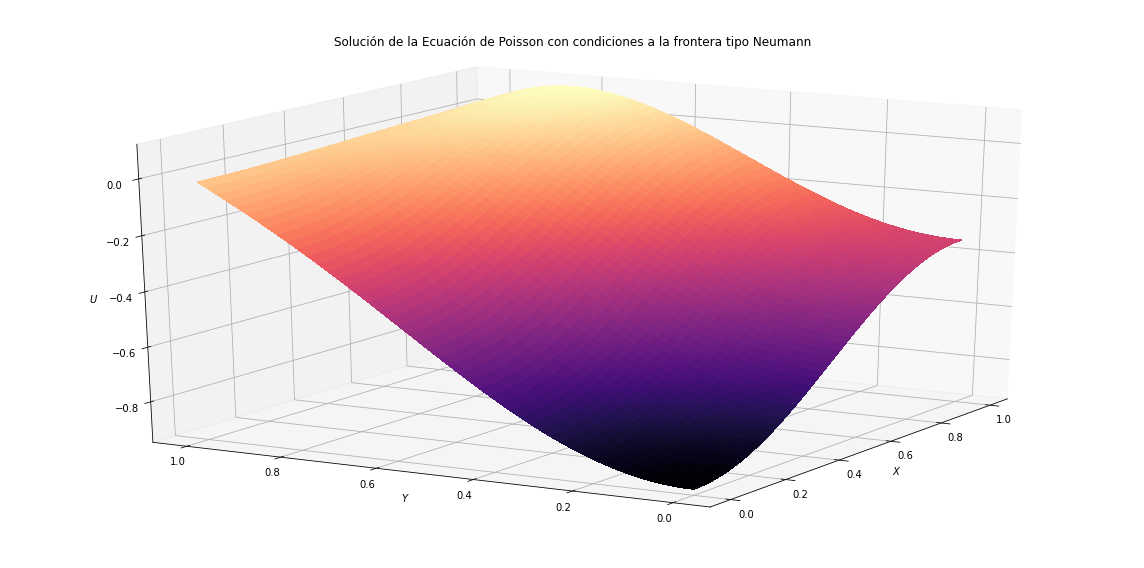

In [10]:
M = 50
( x0, xf ) = ( 0.0, 1.0 )
( y0, yf ) = ( 0.0, 1.0 ) 
hx = ( xf - x0 )/( M - 1 )
hy = ( yf - y0 )/( M - 1 )
X, Y = np.meshgrid(np.linspace( x0, xf, M ), np.linspace( y0, yf, M ))
f = rhs_func( X, Y, M )
A = generate_lhs_matrix( M, hx, hy )
U = np.linalg.solve( A, f*( hx**2 ) )
U = U.reshape( ( M, M ) ).T
fig = plt.figure( figsize = ( 16, 8 ) )
ax = fig.gca( projection = "3d" )
surf = ax.plot_surface( X, Y, U, cmap = cm.magma, linewidth = 0, antialiased = False )
ax.set_xlabel( "$X$" )
ax.set_ylabel( "$Y$" )
ax.set_zlabel( "$U$" )
ax.set_zlim3d()
ax.set_title( "Solución de la Ecuación de Poisson con condiciones a la frontera tipo Neumann" )
plt.tight_layout()
ax.view_init( 20, -150)
plt.show()

Ejercicio 4

Resuelva la ecuación de Poisson sobre un cuadrado unitario

$$\begin{equation*}
- \nabla^2 u(x,y)  =  - 2 \pi^2 \sin(\pi (x+y)) 
\end{equation*}$$
con condiciones de flujo cero en las fronteras (condiciones de frontera tipo Neumann).

$$\begin{eqnarray*}
u_x(0,y) & = & 0 \\
u_x(1,y) & = & 0 \\
u_y(x,0) & = & 0 \\
u_y(x,1) & = & 0
\end{eqnarray*}$$

In [11]:
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits

In [12]:
#Función 1

def rhs_func( x, y, M ):

  g = ( -2*( np.pi )**2*np.sin( np.pi*( X + Y ) ) ).flatten()
  f = [ g[ i :: M ] for i in range( M ) ]
  f = np.asarray( f ).flatten() 
  return f

#Función 2

def bc_dirichlet(x, y, m):

  lBC = np.zeros( ( M, 1 ) ).flatten()
  leftBC = lBC[ 1 : M - 1 ]
  rBC = np.zeros( ( M, 1 ) ).flatten()
  rightBC = rBC[ 1 : M - 1 ]
  tBC = np.zeros( ( 1, M ) ).flatten()
  topBC = tBC[1:M-1]
  bBC = np.zeros( ( 1, M ) ).flatten()
  bottomBC = bBC[ 1 : M - 1 ]

  g1 = np.zeros( ( ( M - 2 )**2, 1 ) ).flatten()    

  for i in range( M - 2 ):
    g1[ ( M - 2 )*i ] = topBC[ i ] 
    
  for j in range( M - 2 ):
    g1[ ( M - 2 )*( j + 1 ) - 1 ] = bottomBC[ j ]
    
  k1 = np.zeros( ( len( leftBC ), 1 ) )
  k1[0] = 1.0
  leftBCk = sparse.kron( k1, leftBC ).toarray().flatten()
    
  k2 = np.zeros( ( len( rightBC ), 1 ) )
  k2[ -1 ] = 1.0
  rightBCk = sparse.kron( k2, rightBC ).toarray().flatten()
    
  g = g1 + leftBCk + rightBCk
  return [ g, lBC, tBC, rBC, bBC ]
    
#Función 3

def generate_lhs_matrix(M, hx, hy):
    
  α = hx**2/hy**2
  main_diag = 2*( 1 + α )*np.ones( ( M , 1 ) ).ravel()
  off_diag = -1*np.ones( ( M - 1, 1 ) ).ravel()
  a = main_diag.shape[ 0 ]
  diagonals = [ main_diag, off_diag, off_diag ]
  B = sparse.diags( diagonals, [ 0,-1, 1 ], shape = ( a, a ) ).toarray()
  B[0,1] = -2.0
  D = sparse.diags( [ -1*np.ones( ( M + 1, 1 ) ).ravel() ], 
                   [ 0 ], shape = ( a, a ) ).toarray()
  C = sparse.diags( [ -2*np.ones( ( M + 1, 1 ) ).ravel() ], 
                   [ 0 ], shape = ( a, a ) ).toarray()
  e1 = sparse.eye( M ).toarray()
  A1 = sparse.kron( e1, B ).toarray()
  e2 = sparse.diags( [ 1*np.ones( ( M, 1 ) ).ravel(), 1*np.ones( ( M, 1 ) ).ravel() ], 
                    [ -1, 1 ], shape = ( M, M ) ).toarray()
  e2[ 0, 1 ] = 0.0
  e2[ M - 1, M - 2 ] = 0.0
  A2 = sparse.kron( e2, D ).toarray()
  e3 = sparse.diags( [ 1*np.ones( ( M, 1 ) ).ravel(), 1*np.ones( ( M, 1 ) ).ravel() ], 
                    [ -1, 1 ], shape = ( M, M ) ).toarray()
  e3[ 1 : M - 1, 0 : M ] = 0.0
  A3 = sparse.kron( e3, C ).toarray()
  mat = A1 + A2 + A3
  return mat

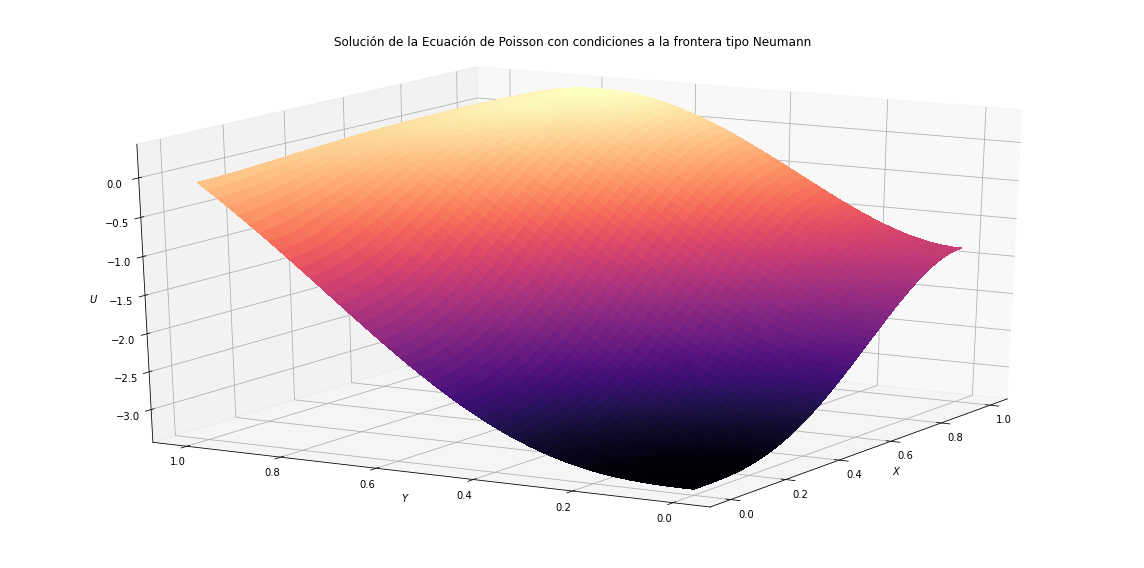

In [13]:
M = 50
( x0, xf ) = ( 0.0, 1.0 )
( y0, yf ) = ( 0.0, 1.0 )
hx = ( xf - x0 )/( M - 1 )
hy = ( yf - y0 )/( M - 1 )
X, Y = np.meshgrid( np.linspace( x0, xf, M ), np.linspace( y0, yf, M ) )
f = rhs_func( X, Y, M )
A = generate_lhs_matrix( M, hx, hy )
U = np.linalg.solve( A, f*( hx**2 ) )
U = U.reshape( ( M, M ) ).T
fig = plt.figure( figsize = ( 16, 8 ) )
ax = fig.gca( projection = "3d" )
surf = ax.plot_surface( X, Y, U, cmap = cm.magma, linewidth = 0, antialiased = False )
ax.set_xlabel( "$X$" )
ax.set_ylabel( "$Y$" )
ax.set_zlabel( "$U$" )
ax.set_zlim3d()
ax.set_title( "Solución de la Ecuación de Poisson con condiciones a la frontera tipo Neumann" )
plt.tight_layout()
ax.view_init(20, -150)
plt.show()